## 차원 축소
* 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
* 차원이 증가할 수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고 희소한 구조를 가지며 예측 신뢰도가 떨어짐
* 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 다중 공선성 문제로 모델의 예측 성능 저하
* 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있음
* 차원 축소는 피처 선택과 피처 추출로 나눌 수 있음
* 피처 선택은 특정 피처에 종속성이 강한 불필요한 피처는 제거하고 데이터의 특징을 잘 나타내는 주요 피처만 선택
* 피처 추출은 기존 피처를 저차원의 중요 피처로 압축해서 추출. 기존의 피처가 압축된 것이므로 기존 피처와는 다른 값이 됨
* 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하며 PCA, SVD, NMF은 대표적인 차원 축소 알고리즘

입력 데이터의 공분산 행렬을 고유벡터와 고유값으로 분해하는 과정은 선형 대수학의 핵심 개념 중 하나이며, 주성분 분석(PCA) 같은 데이터 분석 기법에서 자주 사용됩니다. 이러한 과정을 이해하려면, 우선 공분산 행렬, 고유벡터, 고유값이 무엇인지 이해해야 합니다.


- 행렬을 사용하여 변환(스케일링, 회전 등)을 수행할 수 있습니다. 이 변환 과정에서 변환된 결과가 원래 벡터의 스칼라 배만큼 변하는 벡터가 있을 수 있는데, 이를 '고유벡터'라고 합니다. 즉, 행렬에 의한 변환을 받아도 방향이 바뀌지 않고 크기만 변하는 벡터를 고유벡터라고 합니다.

- 이때 그 벡터가 얼마나 스케일링되는지, 즉 얼마나 크기가 변하는지를 나타내는 스칼라 값을 '고유값'이라고 합니다.

- 위의 설명을 수식 Ax = λx로 매핑해볼 수 있습니다. 여기서 A는 변환을 나타내는 행렬, x는 고유벡터, λ는 고유값입니다. 이 수식은 "행렬 A에 의해 벡터 x가 변환되면, 그 결과는 원래의 벡터 x의 λ배만큼 크기가 변한 벡터"라는 의미를 가지고 있습니다.

- 고유벡터와 고유값을 찾는 것은, 주어진 행렬의 변환에 대하여 방향은 유지하면서 크기만 변하는 벡터와 그 변화의 크기를 찾는 것입니다.

#### 선형대수식
* 크기와 방향을 가지고 있는 것을 vector, 반면 크기만 있는 것(질량, 온도, 길이)을 scalar이라고 한다
* 고유벡터 : 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터 Ax = ax(A 행렬, x 고유벡터, a 스칼라)
* 고유값(Eigenvalue) : 고유 벡터의 크기. 입력데이터의 분산
* 선형 변환 : 특정 벡터에 행렬  A를 곱해 새로운 벡터로 변환
* 공분산 행렬 : 두변수간의 변동을 의미. 공분산 Cov(X,Y) > 0 은 X가 증가할 때 Y도 증가
* 대칭행렬 : 고유벡터를 항상 직교행렬로 고유값을 정방 행렬로 대각화할 수 있음
* 직교행렬 : 대각원소 이외의 모든 원소가 0일때. 직교행렬의 역행렬은 직교행렬 자신의 전치행렬과 같음

In [4]:
import numpy as np

#  대칭행열: 대각선을 기준으로 같은 원소가 각각 배치된 행열

a = np.array([[1,2,3],
            [2,4,5],
             [3,5,6]])

print(a)

[[1 2 3]
 [2 4 5]
 [3 5 6]]


In [9]:
# 직교 행열 : 자신과 자신의 전치 행열을 곱하면 단위 행열이 되는 행열

o = np.array([[1,1], [0,2]])

print(o, '\n')
print(o.T, '\n')
print(np.dot(o, o.T), '\n')

o_inv = np.linalg.inv(o)

print(o_inv, '\n')

print(np.dot(o, o_inv))

[[1 1]
 [0 2]] 

[[1 0]
 [1 2]] 

[[2 2]
 [2 4]] 

[[ 1.  -0.5]
 [ 0.   0.5]] 

[[1. 0.]
 [0. 1.]]


In [11]:
a = np.array([[1,2],  [3,4]])

print(a, '\n')
print(a.T,'\n')
print(np.dot(a, a.T), '\n')

a_inv = np.linalg.inv(a)

print(a_inv, '\n')
print(np.dot(a, a_inv))

[[1 2]
 [3 4]] 

[[1 3]
 [2 4]] 

[[ 5 11]
 [11 25]] 

[[-2.   1. ]
 [ 1.5 -0.5]] 

[[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]


In [14]:
a = np.array([[1,2,3],
             [4,5,6],
             [7,8,9]])

print(a,'\n')
print(a.T,'\n')

symmetric_matrix = (a + a.T) / 2
print(symmetric_matrix)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

[[1 4 7]
 [2 5 8]
 [3 6 9]] 

[[1. 3. 5.]
 [3. 5. 7.]
 [5. 7. 9.]]


In [19]:
eigval, eigvec = np.linalg.eig(symmetric_matrix)

print('고유값 eigenvalues : ', eigval)
print('고유벡터 eigenvectors : \n', eigvec)

고유값 eigenvalues :  [ 1.64582364e+01 -1.45823643e+00  1.49027878e-16]
고유벡터 eigenvectors : 
 [[-0.35162514 -0.84243284  0.40824829]
 [-0.55335618 -0.1647127  -0.81649658]
 [-0.75508721  0.51300744  0.40824829]]


#### 행렬 분해
- 공분산 행렬은 여러 변수간의 공분산을 행렬 형태로 나타낸 것입니다. 대각선 원소는 각 변수의 분산을 나타내고, 비대각선 원소는 서로 다른 두 변수간의 공분산을 나타냅니다.
- 공분산 행렬을 고유벡터와 고유값으로 분해하는 과정은 대략적으로 다음과 같습니다.

    - 입력 데이터로부터 공분산 행렬을 계산합니다.
    - 계산된 공분산 행렬에 대해 고유값과 고유벡터를 찾습니다. 이를 위해 보통 행렬 대수학에서 사용하는 기법들을 활용합니다.
    - 고유값을 내림차순으로 정렬하고, 해당 고유값에 대응되는 고유벡터도 같은 순서로 정렬합니다. 이 때, 각 고유벡터는 서로 직교(orthogonal)합니다.
    - 최종적으로 고유값과 고유벡터는 원래의 공분산 행렬을 재구성하는 데 사용됩니다.

이 과정을 통해, 데이터의 공분산 행렬은 그 행렬을 이루는 벡터공간에 대한 정보, 즉, 고유벡터(방향)와 고유값(크기)을 추출할 수 있게 됩니다. 이는 데이터의 차원 축소, 노이즈 제거, 특성 추출 등 다양한 분석에 사용되는 기법입니다.

In [22]:
data =  np.array([[1,2,3],
             [4,5,6],
             [7,8,9]])

print(data, '\n')

# 공분산 행열 계산
cov_mat = np.cov(data.T)
print(cov_mat, '\n')

# 고유값과 고유 벡터 계산
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print(eig_vals, '\n')
print(eig_vecs, '\n')

# 고유값 정렬 및 해당하는 고유 벡터 매칭
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x : x[0], reverse = True)

print('eigenvalues in descending order : ')

for i in eig_pairs :
    print(i[0], i[1])

# 각 고유벡터가 직교하는지 확인 내적 = 0
print('\northogonality check : ')
print(np.dot(eig_vecs[:, 0], eig_vecs[:, 1]))

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

[[9. 9. 9.]
 [9. 9. 9.]
 [9. 9. 9.]] 

[ 2.70000000e+01  4.31408308e-31 -2.04583522e-16] 

[[ 5.77350269e-01  7.44271337e-16 -4.35592526e-01]
 [ 5.77350269e-01 -7.07106781e-01 -3.80279287e-01]
 [ 5.77350269e-01  7.07106781e-01  8.15871813e-01]] 

eigenvalues in descending order : 
27.000000000000007 [0.57735027 0.57735027 0.57735027]
2.0458352227148038e-16 [-0.43559253 -0.38027929  0.81587181]
4.314083075427408e-31 [ 7.44271337e-16 -7.07106781e-01  7.07106781e-01]

orthogonality check : 
-1.1102230246251565e-16


In [26]:
a = np.array([[4,2], [1, 3]])

eig_val, eig_vec = np.linalg.eig(a)

eig_val_mat = np.diag(eig_vals)

a_reconstructed = eig_vec @ eig_val_mat @ np.linalg.inv(eig_vec)

print('original matrix : ')
print(a)

print('\nreconstructed matrix from eigendecomposisition : ')
print(a_reconstructed)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

#### PCA
* 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며 이렇게 분해된 고유벡터을 이용해 입력 데이터를 선형 변환하는 방식이 PCA
* 입력 데이터 세트의 공분산 행렬을 생성
* 공분산 행렬의 고유벡터와 고유값을 계산
* 고유값이 가장 큰 순으로 K개(PCA 변환 차수)만큼 고유벡터를 추출
* 고유값이 가장 큰 순으로 추출되며 고유벡터를 이용해 새롭게 입력 데이터을 변환

#### LDA(Linear Discriminant Analysis)
* PCA와 매우 유사한 방식이며 PCA가 입력 데이터 변동성의 가장 큰 축을 찾는데 반해 LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는 방식으로 차원을 축소

#### SVD, NMF
* 매우 많은 피처 데이터를 가진 고차원 행렬을 두 개의 저차원 행렬로 분리하는 행렬 분해 기법.
* 행렬 분해를 수행하면서 원본 행렬에서 잠재된 요소를 추출하기 때문에 토픽 모델이나 추천 시스템에서 활발하게 사용

In [27]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

irisdf = pd.DataFrame(iris.data, columns = columns)
irisdf['target'] = iris.target

irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


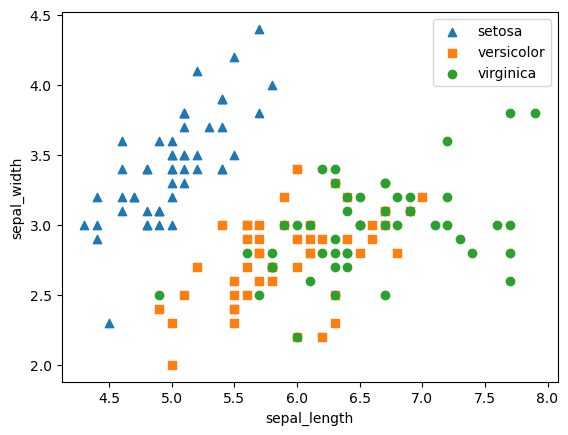

In [31]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers) :
    x_axis_data = irisdf[irisdf['target'] == i]['sepal_length']
    y_axis_data = irisdf[irisdf['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisdf.iloc[:, : -1])

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [40]:
pca_columns = ['pca_component_1', 'pca_component_2']

irisdf_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisdf_pca['target'] = iris.target
irisdf_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


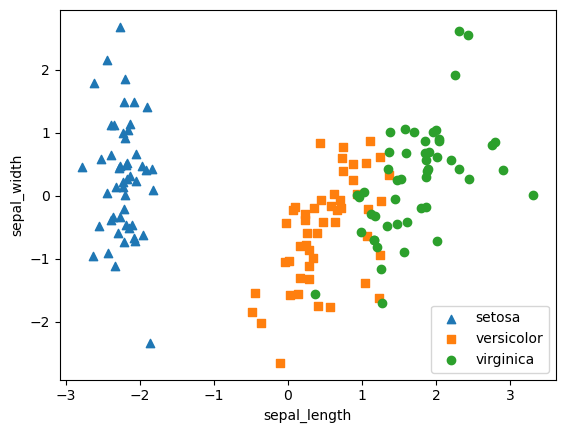

In [46]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers) :
    x_axis_data = irisdf_pca[irisdf_pca['target'] == i]['pca_component_1']
    y_axis_data = irisdf_pca[irisdf_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

plt.show()

In [49]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [51]:
# iris data 원본과 차원축소 데이터에 대하여 각각 모델링(rg) 평가 (교차검증) 한 후 결과를 비교하세요

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring = 'accuracy', cv = 3)

print('원본 데이터 교차 검증 개별 정확도 : ', scores)
print('원본 데이터 평균 정확도 : ', np.mean(scores))

원본 데이터 교차 검증 개별 정확도 :  [0.98 0.94 0.96]
원본 데이터 평균 정확도 :  0.96


In [54]:
pca_x = irisdf_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_x, iris.target, scoring = 'accuracy', cv = 3)
print('pca 변환 데이터 교차 검증 개별 정확도 : ', scores_pca)
print('pca 변환 데이터 평균 정확도 : ', np.mean(scores_pca))

pca 변환 데이터 교차 검증 개별 정확도 :  [0.88 0.88 0.88]
pca 변환 데이터 평균 정확도 :  0.88
